C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


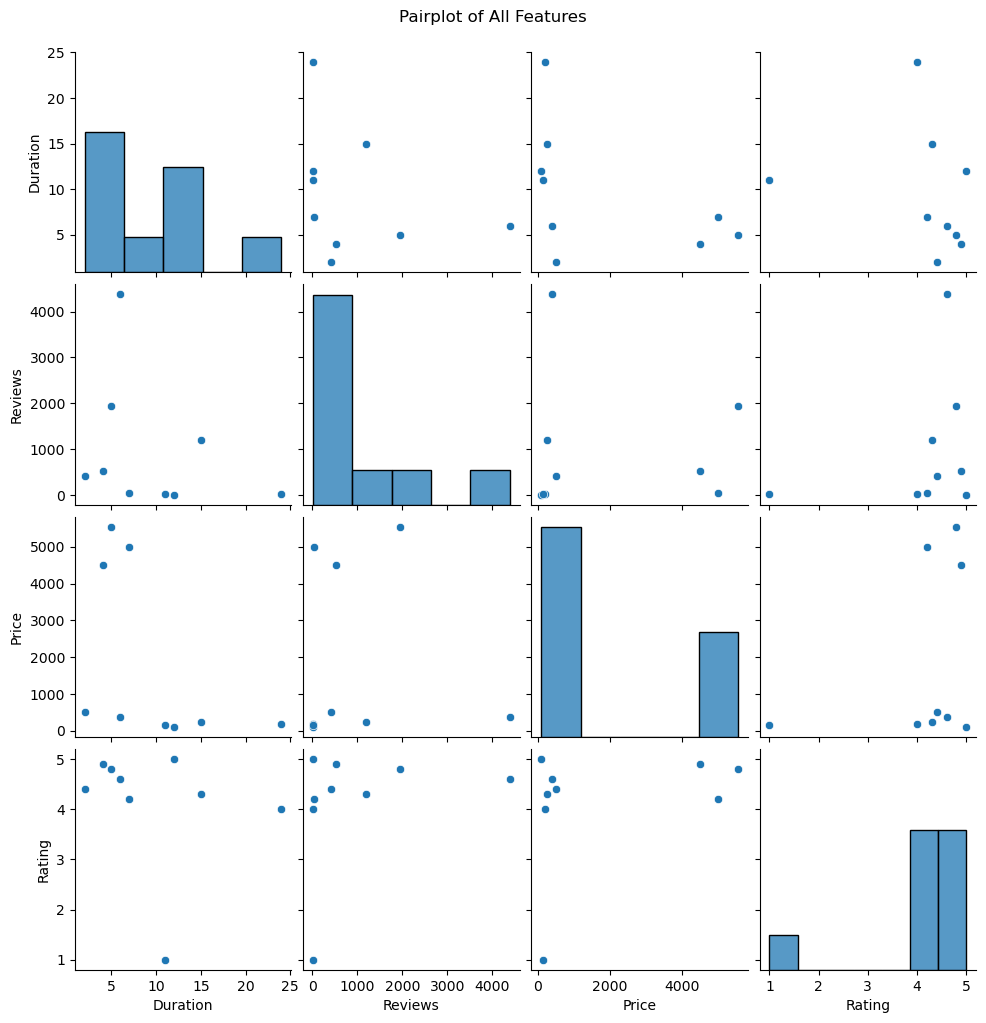

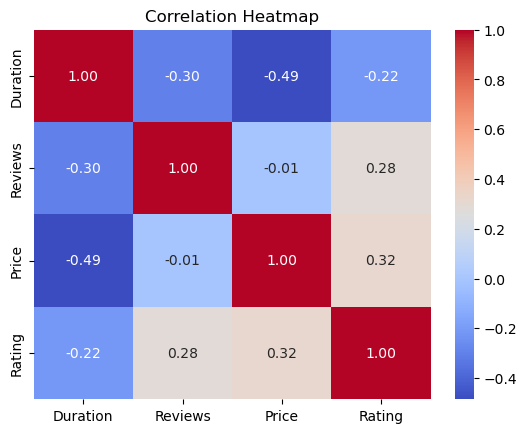

Mean Squared Error: 0.4953
R-squared: -1.4459


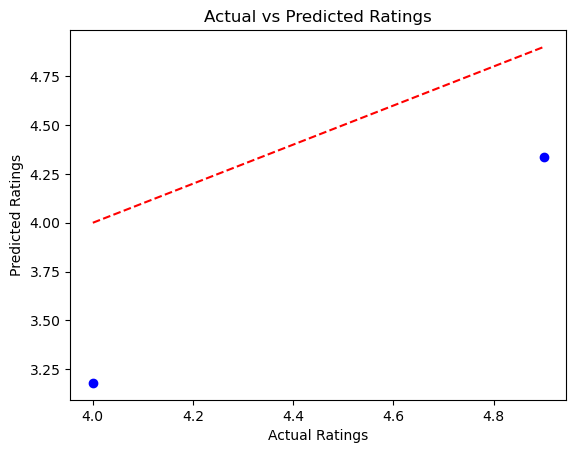

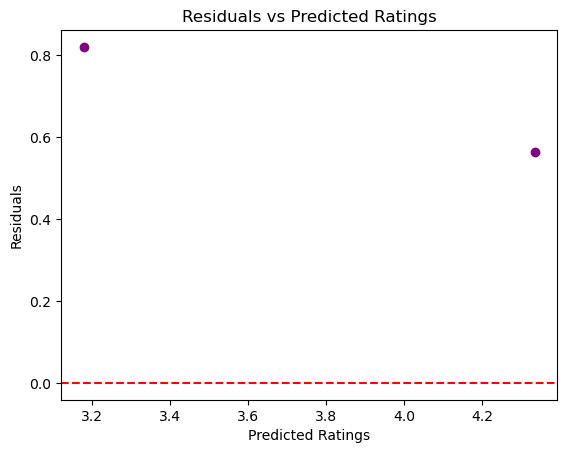

Predicted Rating: 3.69


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample DataFrame (replace this with your actual dataset)
data = {
    'Duration': [12, 24, 11, 15, 6, 7, 5, 4,2],
    'Reviews': [10, 15, 22, 1195, 4383, 37, 1951, 530,422],
    'Price': [100, 200, 150, 250, 390, 5000, 5553, 4500,500],
    'Rating': [5, 4, 1, 4.3, 4.6, 4.2, 4.8, 4.9,4.4]
}
df = pd.DataFrame(data)

# Step 1: Data Exploration and Visualization
sns.pairplot(df)
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 2: Define Features and Target Variable
X = df[['Duration', 'Reviews', 'Price']]  # Independent variables (features)
y = df['Rating']  # Dependent variable (target)

# Step 3: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)  # Predictions on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Scatter Plot: Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Ratings")
plt.show()

# Step 6: Make Future Predictions
# Example: Predict ratings for a course with new data
new_data = np.array([[4, 30, 500]])  # Input format: [duration_in_weeks, reviews, price]
future_prediction = model.predict(new_data)

print(f"Predicted Rating: {future_prediction[0]:.2f}")
